In [69]:
import urllib
import pandas as pd
import xml.etree.ElementTree as ET
import datetime as dt

In [76]:
#Dohvaćanje mjerenja dnevne koncentracije lebdećih čestica PM10 za 2017. godinu za grad Osijek. 
url = "http://iszz.azo.hr/iskzl/rs/podatak/export/xml?postaja=160&polutant=5&tipPodatka=5&vrijemeOd=01.01.2017&vrijemeDo=31.12.2017"
airQualityHR = urllib.request.urlopen(url).read()
root = ET.fromstring(airQualityHR)
df = pd.DataFrame(columns=('mjerenje', 'vrijeme'))

i = 0
while True:
    try:
        obj = list(list(root)[i])
    except:
        break
    row = dict(zip(['mjerenje', 'vrijeme'], [obj[0].text, obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    df = df.append(row_s)
    i = i + 1

df.mjerenje = df.mjerenje.astype('float')
df.vrijeme = pd.to_datetime(df.vrijeme, utc=True)
df['mjesec'] = df['vrijeme'].dt.month
df['danTjedna'] = df['vrijeme'].dt.dayofweek
print(df)

     mjerenje                   vrijeme  mjesec  danTjedna
0      80.235 2016-12-31 23:00:00+00:00      12          5
1     101.146 2017-01-01 23:00:00+00:00       1          6
2      43.470 2017-01-02 23:00:00+00:00       1          0
3      49.025 2017-01-03 23:00:00+00:00       1          1
4      32.813 2017-01-04 23:00:00+00:00       1          2
..        ...                       ...     ...        ...
347    35.339 2017-12-26 23:00:00+00:00      12          1
348    19.594 2017-12-27 23:00:00+00:00      12          2
349    19.798 2017-12-28 23:00:00+00:00      12          3
350    40.061 2017-12-29 23:00:00+00:00      12          4
351    42.886 2017-12-30 23:00:00+00:00      12          5

[352 rows x 4 columns]


In [71]:
#Ispis tri datuma u godini kada je koncentracija PM10 bila najveća
df_3_najveca = (df.sort_values('mjerenje', ascending=False)).head(3).vrijeme
print(df_3_najveca)

21   2017-01-21 23:00:00+00:00
20   2017-01-20 23:00:00+00:00
29   2017-01-29 23:00:00+00:00
Name: vrijeme, dtype: datetime64[ns, UTC]


mjesec
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    2
11    5
12    6
dtype: int64


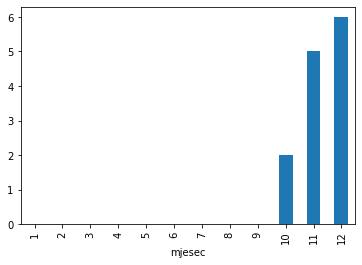

In [72]:
#Pomoću barplot prikažite ukupni broj izostalih vrijednosti tijekom svakog mjeseca. 
df_dani = df.groupby('mjesec').count().vrijeme.subtract([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
df_dani = df_dani.abs()
df_dani.plot.bar()
print(df_dani)

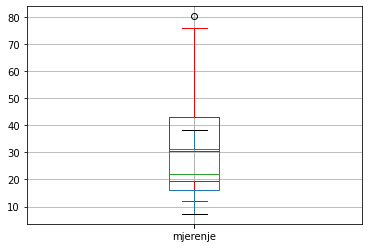

In [78]:
#Pomoću boxplot usporedite PM10 koncentraciju tijekom jednog zimskog i jednog ljetnog mjeseca
prosinac = df[df.mjesec==12]
kolovoz = df[df.mjesec==8]
prosinac.boxplot('mjerenje', color='red')
kolovoz.boxplot('mjerenje')

In [88]:
#Usporedbu distribucije PM10 čestica tijekom radnih dana s distribucijom čestica tijekom vikenda.
radni_bools = (df.danTjedna == 1) or (df.danTjedna == 2)
#radni_dani = df[]
#weekend = df[(df.danTjedna == 0) || (df.danTjedna == 6)]
print(radni_bool)
#print(weekend)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().